In the baseline models comparison phase, we consider `catboost`, one of the state-of-the-art Gradient Boosting model. So prior installation is required before use.

In [72]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [74]:
# Analysis and Preprocessing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Modeling and Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [75]:
df = pd.read_csv('/content/drive/MyDrive/SEMESTER 4 COURSES/Artificial Intelligence/Prototype Project/Datasets/Scaled + Ordinal & OneHot df.csv')
df.head()

,Gender,Age,Hypertension,Heart Disease,Ever Married,Avg Glucose Level,Bmi,Stroke,Work Type_Private,Work Type_Self-employed,Work Type_Govt_job,Work Type_children,Work Type_Never_worked,Residence Type_Urban,Residence Type_Rural,Smoking Status_formerly smoked,Smoking Status_never smoked,Smoking Status_smokes,Smoking Status_Unknown
0,1,1.051434,0,1,1,2.706375,1.005086,1,0,0,1,0,0,0,1,0,1,0,0
1,0,0.786070,0,0,1,2.121559,-0.098981,1,0,0,0,1,0,1,0,0,0,1,0
2,1,1.626390,0,1,1,-0.005028,0.472536,1,0,0,1,0,0,1,0,0,0,1,0
3,0,0.255342,0,0,1,1.437358,0.719327,1,0,0,1,0,0,0,1,0,0,0,1
4,0,1.582163,1,0,1,1.501184,-0.631531,1,0,0,0,1,0,1,0,0,0,1,0


# Data Splitting

In [76]:
X = df.drop('Stroke', axis = 'columns')
y = df['Stroke']

In [77]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [78]:
y_train_full.value_counts()

0    3889
1     199
Name: Stroke, dtype: int64

In [79]:
y_test.value_counts()

0    972
1     50
Name: Stroke, dtype: int64

# Baseline Models

In [80]:
from sklearn.linear_model import LogisticRegression

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, stratify = y_train_full,
                                                      test_size = 0.2, random_state = 1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       818
           1       0.00      0.00      0.00         0

    accuracy                           0.95       818
   macro avg       0.50      0.48      0.49       818
weighted avg       1.00      0.95      0.97       818



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


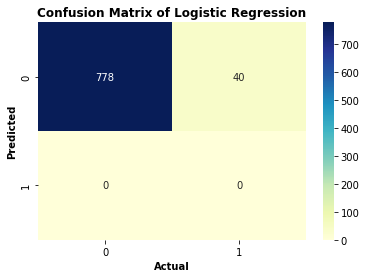

In [81]:
sns.heatmap(confusion_matrix(predictions, y_valid), annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Confusion Matrix of Logistic Regression', fontweight = 'bold')
plt.xlabel('Actual', fontweight = 'bold')
plt.ylabel('Predicted', fontweight = 'bold')
plt.show()

In [82]:
def cross_validation(model_class):
    folds = StratifiedKFold(n_splits = 5, shuffle = True)
    recall_scores = []
    precision_scores = []
    f1_scores = []
    accuracy_scores = []
    for fold, (train_idx, valid_idx) in enumerate(folds.split(X_train_full, y_train_full)):
        X_train, y_train = X_train_full.iloc[train_idx], y_train_full.iloc[train_idx]
        X_valid, y_valid = X_train_full.iloc[valid_idx], y_train_full.iloc[valid_idx]

        model = model_class
        model.fit(X_train, y_train)
        predictions = model.predict(X_valid)

        recall_scores.append(recall_score(predictions, y_valid))
        precision_scores.append(precision_score(predictions, y_valid))
        f1_scores.append(f1_score(predictions, y_valid))
        accuracy_scores.append(accuracy_score(predictions, y_valid))

    return np.mean(recall_scores), np.mean(precision_scores), np.mean(f1_scores), np.mean(accuracy_scores)

def evaluate_baseline(models):
    avg_recall_scores = []
    avg_precision_scores = []
    avg_f1_scores = []
    avg_accuracy_scores = []
    for model in models:
        recall, precision, f1_score, accuracy = cross_validation(model)
        avg_recall_scores.append(recall)
        avg_precision_scores.append(precision)
        avg_f1_scores.append(f1_score)
        avg_accuracy_scores.append(accuracy)

    baseline_df = pd.DataFrame({'Model': [str(model).strip('()') for model in models], 
                                'Recall': avg_recall_scores,
                                'Precision': avg_precision_scores,
                                'F1 Score': avg_f1_scores,
                                'Accuracy': avg_accuracy_scores}).sort_values('Recall', ascending = False)
    baseline_df.loc[len(models) - 1, 'Model'] = 'CatBoostClassifier'
    return baseline_df

In [83]:
models = [LogisticRegression(), SGDClassifier(), KNeighborsClassifier(), SVC(),
          DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), 
          MLPClassifier(), LinearDiscriminantAnalysis(), XGBClassifier(), LGBMClassifier(), 
          CatBoostClassifier()]

In [84]:
baseline_df = evaluate_baseline(models)
baseline_df

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

Streaming output truncated to the last 5000 lines.
4:	learn: 0.5773088	total: 8.02ms	remaining: 1.59s
5:	learn: 0.5576041	total: 9.88ms	remaining: 1.64s
6:	learn: 0.5339922	total: 12ms	remaining: 1.7s
7:	learn: 0.5149722	total: 14ms	remaining: 1.74s
8:	learn: 0.4935451	total: 16.1ms	remaining: 1.78s
9:	learn: 0.4730232	total: 18.4ms	remaining: 1.82s
10:	learn: 0.4595957	total: 20.5ms	remaining: 1.84s
11:	learn: 0.4423611	total: 22.7ms	remaining: 1.87s
12:	learn: 0.4286838	total: 25ms	remaining: 1.9s
13:	learn: 0.4138661	total: 27.2ms	remaining: 1.92s
14:	learn: 0.4022040	total: 29.4ms	remaining: 1.93s
15:	learn: 0.3886664	total: 31.6ms	remaining: 1.95s
16:	learn: 0.3777648	total: 33.9ms	remaining: 1.96s
17:	learn: 0.3685870	total: 35.7ms	remaining: 1.95s
18:	learn: 0.3578821	total: 37.9ms	remaining: 1.96s
19:	learn: 0.3477508	total: 40.1ms	remaining: 1.97s
20:	learn: 0.3397688	total: 42.4ms	remaining: 1.98s
21:	learn: 0.3316220	total: 44.6ms	remaining: 1.98s
22:	learn: 0.3246142	total:

,Model,Recall,Precision,F1 Score,Accuracy
11,CatBoostClassifier,0.333333,0.030256,0.053965,0.947652
8,LinearDiscriminantAnalysis,0.273845,0.085513,0.127709,0.943491
0,LogisticRegression,0.200000,0.005000,0.009756,0.951321
6,AdaBoostClassifier,0.160000,0.020128,0.035758,0.949364
10,LGBMClassifier,0.157143,0.035128,0.055856,0.943493
7,MLPClassifier,0.140794,0.020128,0.034824,0.947162
4,DecisionTreeClassifier,0.134823,0.175769,0.151324,0.906799
5,RandomForestClassifier,0.066667,0.005000,0.009302,0.950098
2,KNeighborsClassifier,0.040000,0.005000,0.008889,0.948875
1,SGDClassifier,0.000000,0.000000,0.000000,0.951321


# Class Weight Manipulation

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, stratify = y_train_full,
                                                      test_size = 0.2, random_state = 1)

In [86]:
y_train.value_counts()

0    3111
1     159
Name: Stroke, dtype: int64

In [87]:
y_valid.value_counts()

0    778
1     40
Name: Stroke, dtype: int64

In [88]:
minority_class_weight = 0.05

In [89]:
weighted_lgbm = LGBMClassifier(class_weight = {0: minority_class_weight, 1: 1 - minority_class_weight})
weighted_lgbm.fit(X_train, y_train)
predictions = weighted_lgbm.predict(X_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       760
           1       0.20      0.14      0.16        58

    accuracy                           0.90       818
   macro avg       0.57      0.55      0.55       818
weighted avg       0.88      0.90      0.89       818



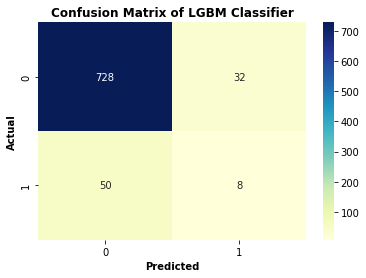

In [90]:
sns.heatmap(confusion_matrix(predictions, y_valid), annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Confusion Matrix of LGBM Classifier', fontweight = 'bold')
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.show()

Minority Class Weight: 5e-3

In [91]:
minority_class_weight = 5e-3

In [92]:
weighted_lgbm = LGBMClassifier(class_weight = {0: minority_class_weight, 1: 1 - minority_class_weight})
weighted_lgbm.fit(X_train, y_train)
predictions = weighted_lgbm.predict(X_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       746
           1       0.33      0.18      0.23        72

    accuracy                           0.89       818
   macro avg       0.62      0.57      0.59       818
weighted avg       0.87      0.89      0.88       818



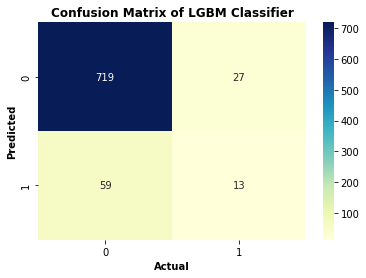

In [93]:
sns.heatmap(confusion_matrix(predictions, y_valid), annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Confusion Matrix of LGBM Classifier', fontweight = 'bold')
plt.xlabel('Actual', fontweight = 'bold')
plt.ylabel('Predicted', fontweight = 'bold')
plt.show()

# Over Sampling

SMOTE: Synthetic Minority Over Sampling Technique

In [94]:
over_sampler = SMOTE()
X, y = over_sampler.fit_resample(X, y)

# Save Oversampled Data

In [95]:
oversampled_df = X.copy()
oversampled_df['Stroke'] = y
oversampled_df.to_csv('oversampled_df.csv', index = False)

Split the data.

In [96]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [97]:
y_train_full.value_counts()

0    3889
1    3888
Name: Stroke, dtype: int64

In [98]:
y_test.value_counts()

1    973
0    972
Name: Stroke, dtype: int64

Check for possible existence of duplicated data since they may cause poor performance for the Machine Learning models.

In [99]:
X_train_full.duplicated().sum()

0

In [100]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, stratify = y_train_full,
                                                      test_size = 0.2, random_state = 1)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       725
           1       0.87      0.81      0.84       831

    accuracy                           0.83      1556
   macro avg       0.83      0.84      0.83      1556
weighted avg       0.84      0.83      0.84      1556



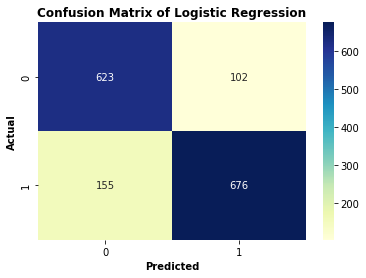

In [101]:
sns.heatmap(confusion_matrix(predictions, y_valid), annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Confusion Matrix of Logistic Regression', fontweight = 'bold')
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.show()

In [102]:
baseline_df = evaluate_baseline(models)
baseline_df

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6285006	total: 14.1ms	remaining: 2.81s
5:	learn: 0.6165785	total: 17.2ms	remaining: 2.86s
6:	learn: 0.6034199	total: 20.3ms	remaining: 2.88s
7:	learn: 0.5935871	total: 23.4ms	remaining: 2.9s
8:	learn: 0.5851889	total: 26.4ms	remaining: 2.91s
9:	learn: 0.5781046	total: 29.3ms	remaining: 2.9s
10:	learn: 0.5710507	total: 32.4ms	remaining: 2.92s
11:	learn: 0.5632420	total: 35.6ms	remaining: 2.93s
12:	learn: 0.5552975	total: 38.8ms	remaining: 2.94s
13:	learn: 0.5485062	total: 41.7ms	remaining: 2.94s
14:	learn: 0.5406504	total: 44.6ms	remaining: 2.93s
15:	learn: 0.5346352	total: 47.5ms	remaining: 2.92s
16:	learn: 0.5284537	total: 50.6ms	remaining: 2.93s
17:	learn: 0.5234494	total: 53.7ms	remaining: 2.93s
18:	learn: 0.5180471	total: 56.9ms	remaining: 2.94s
19:	learn: 0.5133707	total: 59.7ms	remaining: 2.93s
20:	learn: 0.5077368	total: 62.9ms	remaining: 2.93s
21:	learn: 0.5033001	total: 66ms	remaining: 2.93s
22:	learn: 0.4986726	to

,Model,Recall,Precision,F1 Score,Accuracy
10,LGBMClassifier,0.940094,0.947533,0.943745,0.943552
11,CatBoostClassifier,0.923554,0.958850,0.940819,0.939694
5,RandomForestClassifier,0.910125,0.965793,0.937123,0.935194
7,MLPClassifier,0.880661,0.934676,0.906679,0.903819
4,DecisionTreeClassifier,0.872854,0.900206,0.886212,0.884402
3,SVC,0.845100,0.933379,0.886988,0.881057
2,KNeighborsClassifier,0.837051,0.976593,0.901396,0.893147
9,XGBClassifier,0.816695,0.925671,0.867754,0.858944
0,LogisticRegression,0.815020,0.842851,0.828670,0.825768
8,LinearDiscriminantAnalysis,0.812232,0.852625,0.831848,0.827568


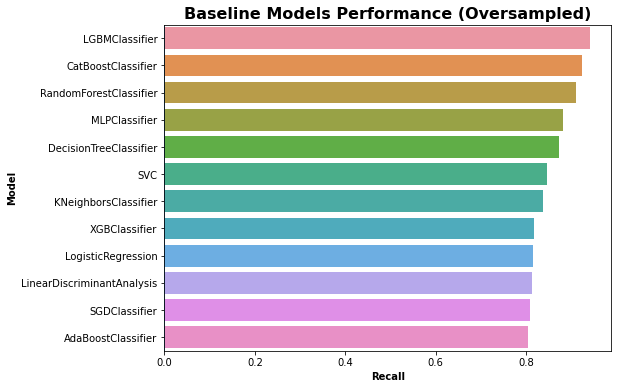

In [103]:
plt.figure(figsize = (8, 6))
barplot = sns.barplot(x = 'Recall', y = 'Model', data = baseline_df, orient = 'horizontal')
plt.title('Baseline Models Performance (Oversampled)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Recall', fontweight = 'bold')
plt.ylabel('Model', fontweight = 'bold')
plt.axvline()
plt.show()

In [104]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
predictions = lgbm.predict(X_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       781
           1       0.94      0.94      0.94       775

    accuracy                           0.94      1556
   macro avg       0.94      0.94      0.94      1556
weighted avg       0.94      0.94      0.94      1556



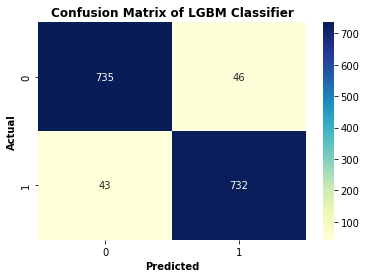

In [105]:
sns.heatmap(confusion_matrix(predictions, y_valid), annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Confusion Matrix of LGBM Classifier', fontweight = 'bold')
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.show()

In [106]:
folds = StratifiedKFold(n_splits = 5, shuffle = True)
for fold, (train_idx, valid_idx) in enumerate(folds.split(X_train_full, y_train_full)):
    X_train, y_train = X_train_full.iloc[train_idx], y_train_full.iloc[train_idx]
    X_valid, y_valid = X_train_full.iloc[valid_idx], y_train_full.iloc[valid_idx]

    model = LGBMClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    print(f'Fold {fold + 1}: {recall_score(predictions, y_valid)}')

Fold 1: 0.934010152284264
Fold 2: 0.9469598965071151
Fold 3: 0.927070457354759
Fold 4: 0.951948051948052
Fold 5: 0.9341772151898734


# Class Weight Manipulation

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, stratify = y_train_full,
                                                      test_size = 0.2, random_state = 1)

In [108]:
y_train.value_counts()

0    3111
1    3110
Name: Stroke, dtype: int64

In [109]:
y_valid.value_counts()

1    778
0    778
Name: Stroke, dtype: int64

Minority Class Weight: 1e-4

In [110]:
minority_class_weight = 1e-4

In [111]:
weighted_lgbm = LGBMClassifier(class_weight = {0: minority_class_weight, 1: 1 - minority_class_weight})
weighted_lgbm.fit(X_train, y_train)
predictions = weighted_lgbm.predict(X_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       474
           1       1.00      0.72      0.84      1082

    accuracy                           0.80      1556
   macro avg       0.80      0.86      0.80      1556
weighted avg       0.88      0.80      0.81      1556



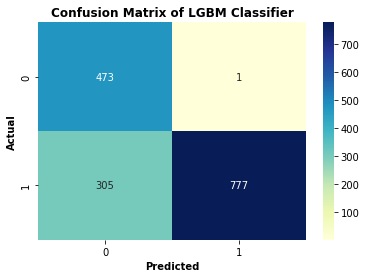

In [112]:
sns.heatmap(confusion_matrix(predictions, y_valid), annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Confusion Matrix of LGBM Classifier', fontweight = 'bold')
plt.xlabel('Predicted', fontweight = 'bold')
plt.ylabel('Actual', fontweight = 'bold')
plt.show()

Minority Class Weight: 5e-3

In [113]:
minority_class_weight = 5e-3

In [114]:
weighted_lgbm = LGBMClassifier(class_weight = {0: minority_class_weight, 1: 1 - minority_class_weight})
weighted_lgbm.fit(X_train, y_train)
predictions = weighted_lgbm.predict(X_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       610
           1       0.98      0.81      0.89       946

    accuracy                           0.88      1556
   macro avg       0.88      0.90      0.88      1556
weighted avg       0.90      0.88      0.88      1556



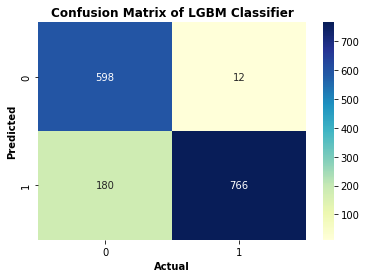

In [115]:
sns.heatmap(confusion_matrix(predictions, y_valid), annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Confusion Matrix of LGBM Classifier', fontweight = 'bold')
plt.xlabel('Actual', fontweight = 'bold')
plt.ylabel('Predicted', fontweight = 'bold')
plt.show()

# Under Sampling

In [116]:
majority_df = df[df['Stroke'] == 0]
minority_df = df[df['Stroke'] == 1]

In [117]:
print('Majority data shape: {}'.format(majority_df.shape))
print('Minority data shape: {}'.format(minority_df.shape))

Majority data shape: (4861, 19)
Minority data shape: (249, 19)


In [118]:
downsampled_majority_df = majority_df.sample(250, random_state = 0)

In [119]:
print('Majority data shape: {} (downsampled)'.format(downsampled_majority_df.shape))

Majority data shape: (250, 19) (downsampled)


In [120]:
downsampled = (downsampled_majority_df, minority_df)
downsampled_df = pd.concat(downsampled).reset_index().drop('index', axis = 1)
downsampled_df.head()

,Gender,Age,Hypertension,Heart Disease,Ever Married,Avg Glucose Level,Bmi,Stroke,Work Type_Private,Work Type_Self-employed,Work Type_Govt_job,Work Type_children,Work Type_Never_worked,Residence Type_Urban,Residence Type_Rural,Smoking Status_formerly smoked,Smoking Status_never smoked,Smoking Status_smokes,Smoking Status_Unknown
0,1,-1.381071,0,0,0,-0.863260,-1.657664,0,0,0,0,0,1,0,1,1,0,0,0
1,0,0.388024,0,0,1,-0.558042,-0.657509,0,1,0,0,0,0,0,1,0,0,0,1
2,0,-1.159934,0,0,0,-0.611489,-0.696476,0,0,0,1,0,0,0,1,1,0,0,0
3,0,-0.673433,0,0,0,-0.676198,0.784273,0,0,0,1,0,0,1,0,0,0,1,0
4,0,-0.938797,0,0,0,-0.880266,-1.086147,0,0,0,1,0,0,0,1,0,0,0,1


In [121]:
downsampled_df.shape

(499, 19)

In [122]:
X = downsampled_df.drop('Stroke', axis = 1)
y = downsampled_df['Stroke']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [123]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, stratify = y_train_full,
                                                      test_size = 0.2, random_state = 0)

In [124]:
X_train.shape

(319, 18)

In [125]:
X_valid.shape

(80, 18)

In [126]:
baseline_models_df = evaluate_baseline(models)
baseline_models_df

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6775321	total: 6.03ms	remaining: 1.2s
5:	learn: 0.6743288	total: 7.37ms	remaining: 1.22s
6:	learn: 0.6712971	total: 8.65ms	remaining: 1.23s
7:	learn: 0.6682969	total: 9.99ms	remaining: 1.24s
8:	learn: 0.6649305	total: 11.3ms	remaining: 1.24s
9:	learn: 0.6618780	total: 12.6ms	remaining: 1.24s
10:	learn: 0.6589728	total: 13.8ms	remaining: 1.24s
11:	learn: 0.6562045	total: 15.2ms	remaining: 1.25s
12:	learn: 0.6535068	total: 16.5ms	remaining: 1.25s
13:	learn: 0.6503929	total: 17.9ms	remaining: 1.26s
14:	learn: 0.6476560	total: 18.9ms	remaining: 1.24s
15:	learn: 0.6446433	total: 20.3ms	remaining: 1.25s
16:	learn: 0.6424336	total: 21.6ms	remaining: 1.25s
17:	learn: 0.6395625	total: 22.9ms	remaining: 1.25s
18:	learn: 0.6364199	total: 24.3ms	remaining: 1.25s
19:	learn: 0.6331886	total: 25.8ms	remaining: 1.27s
20:	learn: 0.6302207	total: 27.2ms	remaining: 1.27s
21:	learn: 0.6272818	total: 28.6ms	remaining: 1.27s
22:	learn: 0.6242953

,Model,Recall,Precision,F1 Score,Accuracy
7,MLPClassifier,0.764406,0.768846,0.766457,0.766930
8,LinearDiscriminantAnalysis,0.761646,0.793846,0.772831,0.766867
0,LogisticRegression,0.756580,0.799359,0.775541,0.769557
11,CatBoostClassifier,0.751795,0.788974,0.760960,0.751804
10,LGBMClassifier,0.739333,0.793974,0.763515,0.754399
5,RandomForestClassifier,0.738529,0.788462,0.761253,0.754304
3,SVC,0.736794,0.804103,0.766030,0.754589
2,KNeighborsClassifier,0.726664,0.733590,0.726912,0.726741
9,XGBClassifier,0.722580,0.783718,0.746564,0.739430
6,AdaBoostClassifier,0.717088,0.774231,0.742720,0.731867


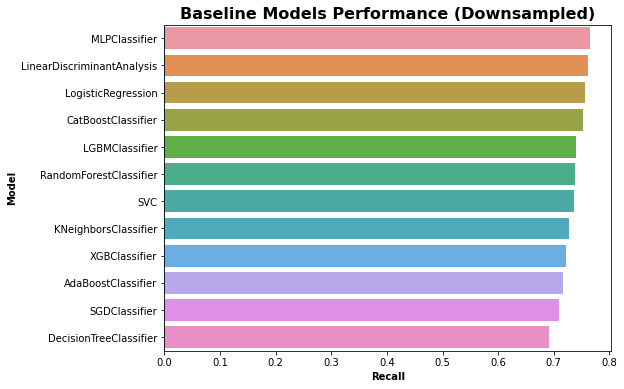

In [127]:
plt.figure(figsize = (8, 6))
barplot = sns.barplot(x = 'Recall', y = 'Model', data = baseline_models_df, orient = 'horizontal')
plt.title('Baseline Models Performance (Downsampled)', fontsize = 16, fontweight = 'bold')
plt.xlabel('Recall', fontweight = 'bold')
plt.ylabel('Model', fontweight = 'bold')
plt.axvline()
plt.show()

In [128]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
predictions = sgd.predict(X_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68        51
           1       0.50      0.69      0.58        29

    accuracy                           0.64        80
   macro avg       0.64      0.65      0.63        80
weighted avg       0.68      0.64      0.64        80



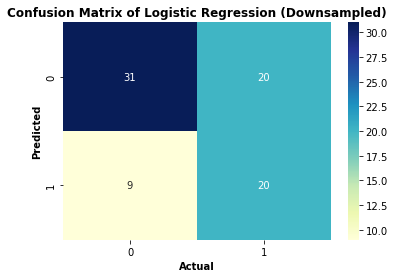

In [129]:
sns.heatmap(confusion_matrix(predictions, y_valid), annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Confusion Matrix of Logistic Regression (Downsampled)', fontweight = 'bold')
plt.xlabel('Actual', fontweight = 'bold')
plt.ylabel('Predicted', fontweight = 'bold')
plt.show()

# Save Downsampled Dataset

In [130]:
downsampled_df.to_csv('downsampled_df.csv', index = False)

# Save Best Baseline Model

In [131]:
import pickle

filename = 'sgd_baseline.pkl'
pickle.dump(sgd, open(filename, 'wb'))

In [132]:
filename = 'lgbm_baseline.pkl'
pickle.dump(lgbm, open(filename, 'wb'))